# Exercise 1
N.B.1 tentative points for each part are: 2+1.5+2+2+1.5 (and one point for free gives 10).

N.B.2 you are to implement the methods yourself.

Given a function $f$, let $T(f,a,b,m)$ denote the composite trapezoid rule with $m$ subintervals over the interval $[a,b]$. 
## (a)
Approximate the integral of $x^{-3}$ over $[a,b] = [ \frac{1}{10}, 100 ]$ by the composite trapezoid rule $T(f,a,b,m)$ for $m = 2^k$. Find the smallest $k$ such that the exact error is less than $\epsilon = 10^{-3}$. Explain the slow convergence.

Error with m = 2^2: 12437.50190493042
Error with m = 2^3: 6193.757543966652
Error with m = 2^4: 3071.9045401305016
Error with m = 2^5: 1511.0507877511611
Error with m = 2^6: 730.8862035130394
Error with m = 2^7: 341.66300344385144
Error with m = 2^8: 149.42002453577987
Error with m = 2^9: 58.21552152480833
Error with m = 2^10: 19.373872773033618
Error with m = 2^11: 5.558454308195508
Error with m = 2^12: 1.459241362024926
Error with m = 2^13: 0.36996806565766605
Error with m = 2^14: 0.09283132515498949
Error with m = 2^15: 0.023229329053748415
Error with m = 2^16: 0.005808680537469968
Error with m = 2^17: 0.0014522544746498056
Error with m = 2^18: 0.0003630688906284263


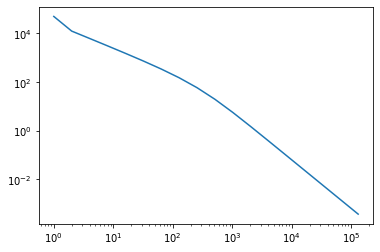

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def trapezoid(f, a, b, m):
    intervals = np.linspace(a, b, m + 1)
    total = 0
    for i in range(m):
        total += (intervals[i + 1] - intervals[i]) * 0.5 * (f(intervals[i]) + f(intervals[i + 1]))
    return total

def fun(x):
    return x ** (-3)

def FUN(x):
    return -0.5 * x ** -2

def residual(a, b, f, F, m):
#     print(trapezoid(f, a, b, m))
#     print(F(b) + F(a))
    return trapezoid(f, a, b, m) - F(b) + F(a)

a, b = 1/10, 100
k = 1
errors = [residual(a, b, fun, FUN, 1)]
while errors[-1] > 1e-3:
    k += 1
    errors.append(residual(a, b, fun, FUN, 2**k))
    print(f"Error with m = 2^{k}: {errors[-1]}")

m = [2**i for i in range(k)]
plt.loglog(m, errors)
plt.show()

Todo: convergeert hij sloom dan?

## (b)

To improve the convergence rate of the above problem, we may use an adaptive strategy, as discussed in the book and the lecture. Consider the following formulas for approximate integration
$$\begin{aligned}
I_1(f,a,b) = {}& T(f,a,b,1) \\
I_2(f,a,b) = {}& T(f,a,b,2) .
\end{aligned}$$
Show, based on the error estimates for the trapezoid rule using the Taylor series (book example 8.2, or a video) that the error in $I_2$ can be estimated by a formula of the form 
$$E_2 = C (I_1 - I_2)$$
and determine the constant $C$ (if you can't find $C$, you may take $C = 0.5$).

We define:
\begin{equation}
    I_2 = \frac{b - a}{4}(f(a) + 2f(\frac{a + b}{2}) + f(b))
\end{equation}

Taylor expansion with $\bar{x} = \frac{a + b}{2}$ you get a Taylor series for $f(x)$:
\begin{equation}
    f(x) \approx f(\bar{x}) + (x - \bar{x})f'(\bar{x}) + \frac{(x - \bar{x})^2}{2} f''(\bar{x}) 
\end{equation}
and for $f(a)$:
\begin{align}
    f(a) &\approx f(\bar{x}) + (a - \bar{x})f'(\bar{x}) + \frac{(a - \bar{x})^2}{2} f''(\bar{x}) \\
    &= f(\bar{x}) - \frac{b - a}{2}f'(\bar{x}) + \frac{(b - a)^2}{8} f''(\bar{x}) 
\end{align}
and for $f(b)$:
\begin{align}
    f(b) &\approx f(\bar{x}) + (b - \bar{x})f'(\bar{x}) + \frac{(b - \bar{x})^2}{2} f''(\bar{x}) \\
    &= f(\bar{x}) + \frac{b - a}{2}f'(\bar{x}) + \frac{(b - a)^2}{8} f''(\bar{x})
\end{align}

Then defining $E_2$ and substituting the previous Taylor expansions: 
\begin{align}
    E_2 &= \int_a^b f(x) dx - I_2 \\
    &= \int_a^b f(\bar{x}) + (x - \bar{x})f'(\bar{x}) + \frac{(x - \bar{x})^2}{2} f''(\bar{x}) dx - \frac{b - a}{4}(f(a) + 2f(\frac{a + b}{2}) + f(b)) \\
    &= (b - a)f(\bar{x}) + \frac{(b - \bar{x})^2}{2}f'(\bar{x}) - \frac{(a - \bar{x})^2}{2}f'(\bar{x}) + \frac{(b - \bar{x})^3}{6}f''(\bar{x}) - \frac{(a - \bar{x})^3}{6}f''(\bar{x}) - (b - a)f(\bar{x}) - \frac{b - a}{8} (\frac{b - a}{2})^2f''(\bar{x})
    &= -\frac{1}{12}(b - a)(\frac{b - a}{2})^2 f''(\bar{x}) \\
    &= -\frac{(b - a)^3}{48}f''(\bar{x})
\end{align}

Furthermore, we know that:
\begin{align}
    I_1 - I_2 &= \frac{b - a}{2}(f(a) + f(b)) - \frac{b - a}{4}(f(a) + f(b) + 2f(\frac{a + b}{2})) \\
    &= \frac{b - a}{4}f(a) + \frac{b - a}{4} f(b) - \frac{b - a}{2}f(\frac{a + b}{2}) \\
    &= \frac{b - a}{4}(f(\bar{x}) - \frac{b - a}{2}f'(\bar{x}) + \frac{(b - a)^2}{8} f''(\bar{x})) + \frac{b - a}{4}(f(\bar{x}) + \frac{b - a}{2}f'(\bar{x}) + \frac{(b - a)^2}{8} f''(\bar{x})) - \frac{b - a}{2}f(\bar{x}) \\
    &= \frac{b - a}{4}(4f(\bar{x}) + \frac{(b - a)^2}{4}f''(\bar{x})) - \frac{b - a}{2} f(\bar{x}) \\ 
    &= \frac{b - a}{2} f(\bar{x}) + \frac{(b - a)^3}{16} f''(\bar{x}) - \frac{b - a}{2} f(\bar{x}) \\
    &= \frac{(b - a)^3}{16} f''(\bar{x})
\end{align}

Therefore the absolute error $E_2$ is equal to $C(I_1 - I_2)$ with $C = 1/3$.

## (c)
An adaptive strategy for computing the integral on an interval $[a,b]$ now is: Compute $I_2$ and $E_2$, and accept $I_2$ as an approximation when the estimated error $E_2$ is less or equal than a desired tolerance $\epsilon$.  Otherwise, apply the procedure to 
$\int_a^{\frac{b+a}{2}} f(x) \, dx$ and $\int_{\frac{b+a}{2}}^b f(x) \, dx$ with tolerances $\frac{\epsilon}{2}$.

Write a recursive python routine that implements the adaptive strategy.

Then apply this routine to the function $x^{-3}$ with $a, b, \epsilon$ as before. What is the exact error in the obtained approximation? 

In [16]:
def trapezoid(f, a, b, m):
    intervals = np.linspace(a, b, m + 1)
    total = 0
    for i in range(m):
        total += (intervals[i + 1] - intervals[i]) * 0.5 * (f(intervals[i]) + f(intervals[i + 1]))
    return total

def fun(x):
    return x ** (-3)

def FUN(x):
    return -0.5 * x ** -2

evaluations = 0

def approximate(a, b, f, tolerance):
    global evaluations
    global c
    evaluations += 1
    I1 = trapezoid(f, a, b, 1)
    I2 = trapezoid(f, a, b, 2)
    E2 = c * (I1 - I2)
    if E2 < tolerance:
        return I2
    middle = (a + b)/2
    return approximate(a, middle, f, tolerance/2) + approximate(middle, b, f, tolerance/2)

a, b = 1/10, 100
c = 1/3
approx = approximate(a, b, fun, 1e-3)
print(f"approximate = {approx} which makes the exact error {FUN(b) - FUN(a) - approx}")    

approximate = 50.00014849011892 which makes the exact error -0.0001984901189260313


## (d)
Count the number of function evaluations used in the adaptive strategy for (c) and compare with the result of (a). Make sure that your python routine performs no unnecessary function evaluations. 
(*Hint*: To count the number of function evaluations, you may use a global variable that is incremented by the function each time it is called.)

In [20]:
print(f"With the value C = {c} as found in (b), (c) takes {evaluations} evaluations where in (a) takes {sum(m)} evaluations.")

With the value C = 0.3333333333333333 as found in (b), (c) takes 9669 evaluations where in (a) takes 262143 evaluations.


Different parts of the function need different intervals to be very precise. The more horizontal a part of the function is, the less intervals it needs. The method of (a) makes evenly distributed subintervals for the whole interval and therefore also making subintervals where they are not needed. The method of (c) looks at the error at specefic subintervals and only further divides the subintervals if needed. Therefore, this method does less unnecassary evaluations. 

## (e)
In the course of executing the recursive procedure, some subintervals are refined (split in two subintervals) while others aren't as a result of the choices made by the algorithm. It turns out that the choices made by this algorithm are not always optimal. Other algorithms, that decide in a different way which subinterval needs to be refined, may be more efficient (while using the same formulas for the approximate integral and the approximate error associated with a subinterval).

Can you explain why this is the case? Discuss briefly possible alternative approaches.
